# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA

In [4]:
df = pd.read_parquet(r"../MyFitnessPal_Clustering/mfp_cleaned.parquet")
df.head()

,ID,Date,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,Chol_goal,Chol_total,...,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total,Trn Fat_goal,Trn Fat_total,Vit A_goal,Vit A_total,Vit C_goal,Vit C_total
0,1,2014-09-14,NaN,NaN,3173.0,2924.0,396.0,340.0,NaN,NaN,...,2300.0,3658.0,119.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014-09-15,NaN,NaN,1572.0,2430.0,196.0,96.0,NaN,NaN,...,2300.0,855.0,59.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2014-09-16,NaN,NaN,1832.0,1862.0,229.0,158.0,NaN,NaN,...,2300.0,2215.0,69.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2014-09-17,NaN,NaN,1685.0,2251.0,210.0,187.0,NaN,NaN,...,2300.0,1765.0,63.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2014-09-18,NaN,NaN,1597.0,2001.0,199.0,113.0,NaN,NaN,...,2300.0,1101.0,60.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587187 entries, 0 to 587186
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              587187 non-null  int64         
 1   Date            587187 non-null  datetime64[ns]
 2   Calcium_goal    22925 non-null   float64       
 3   Calcium_total   22925 non-null   float64       
 4   Calories_goal   587180 non-null  float64       
 5   Calories_total  587161 non-null  float64       
 6   Carbs_goal      573042 non-null  float64       
 7   Carbs_total     573041 non-null  float64       
 8   Chol_goal       18252 non-null   float64       
 9   Chol_total      18252 non-null   float64       
 10  Dishes          587187 non-null  object        
 11  Fat_goal        569328 non-null  float64       
 12  Fat_total       569321 non-null  float64       
 13  Fiber_goal      242840 non-null  float64       
 14  Fiber_total     242838 non-null  flo

# Describe

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,587187.0,NaN,NaN,NaN,4946.919608,1.0,2513.0,4928.0,7427.0,9897.0,2844.724722
Date,587187,NaN,NaN,NaN,2015-01-02 01:00:17.197247232,2014-09-14 00:00:00,2014-11-17 00:00:00,2015-01-10 00:00:00,2015-02-15 00:00:00,2015-04-09 00:00:00,NaN
Calcium_goal,22925.0,NaN,NaN,NaN,101.006107,80.0,100.0,100.0,100.0,200.0,7.090225
Calcium_total,22925.0,NaN,NaN,NaN,68.212912,0.0,28.0,55.0,93.0,6234.0,93.804823
Calories_goal,587180.0,NaN,NaN,NaN,1804.617693,0.0,1450.0,1702.0,2041.0,26068.0,528.841239
Calories_total,587161.0,NaN,NaN,NaN,1421.987281,0.0,1038.0,1403.0,1766.0,1200800.0,2284.531977
Carbs_goal,573042.0,NaN,NaN,NaN,195.154444,0.0,150.0,189.0,236.0,154417.0,293.544589
Carbs_total,573041.0,NaN,NaN,NaN,146.085394,0.0,85.0,142.0,195.0,210865.0,305.315663
Chol_goal,18252.0,NaN,NaN,NaN,302.588922,0.0,300.0,300.0,300.0,1200.0,71.057264
Chol_total,18252.0,NaN,NaN,NaN,208.721893,0.0,48.0,131.0,281.0,30378.0,327.310953


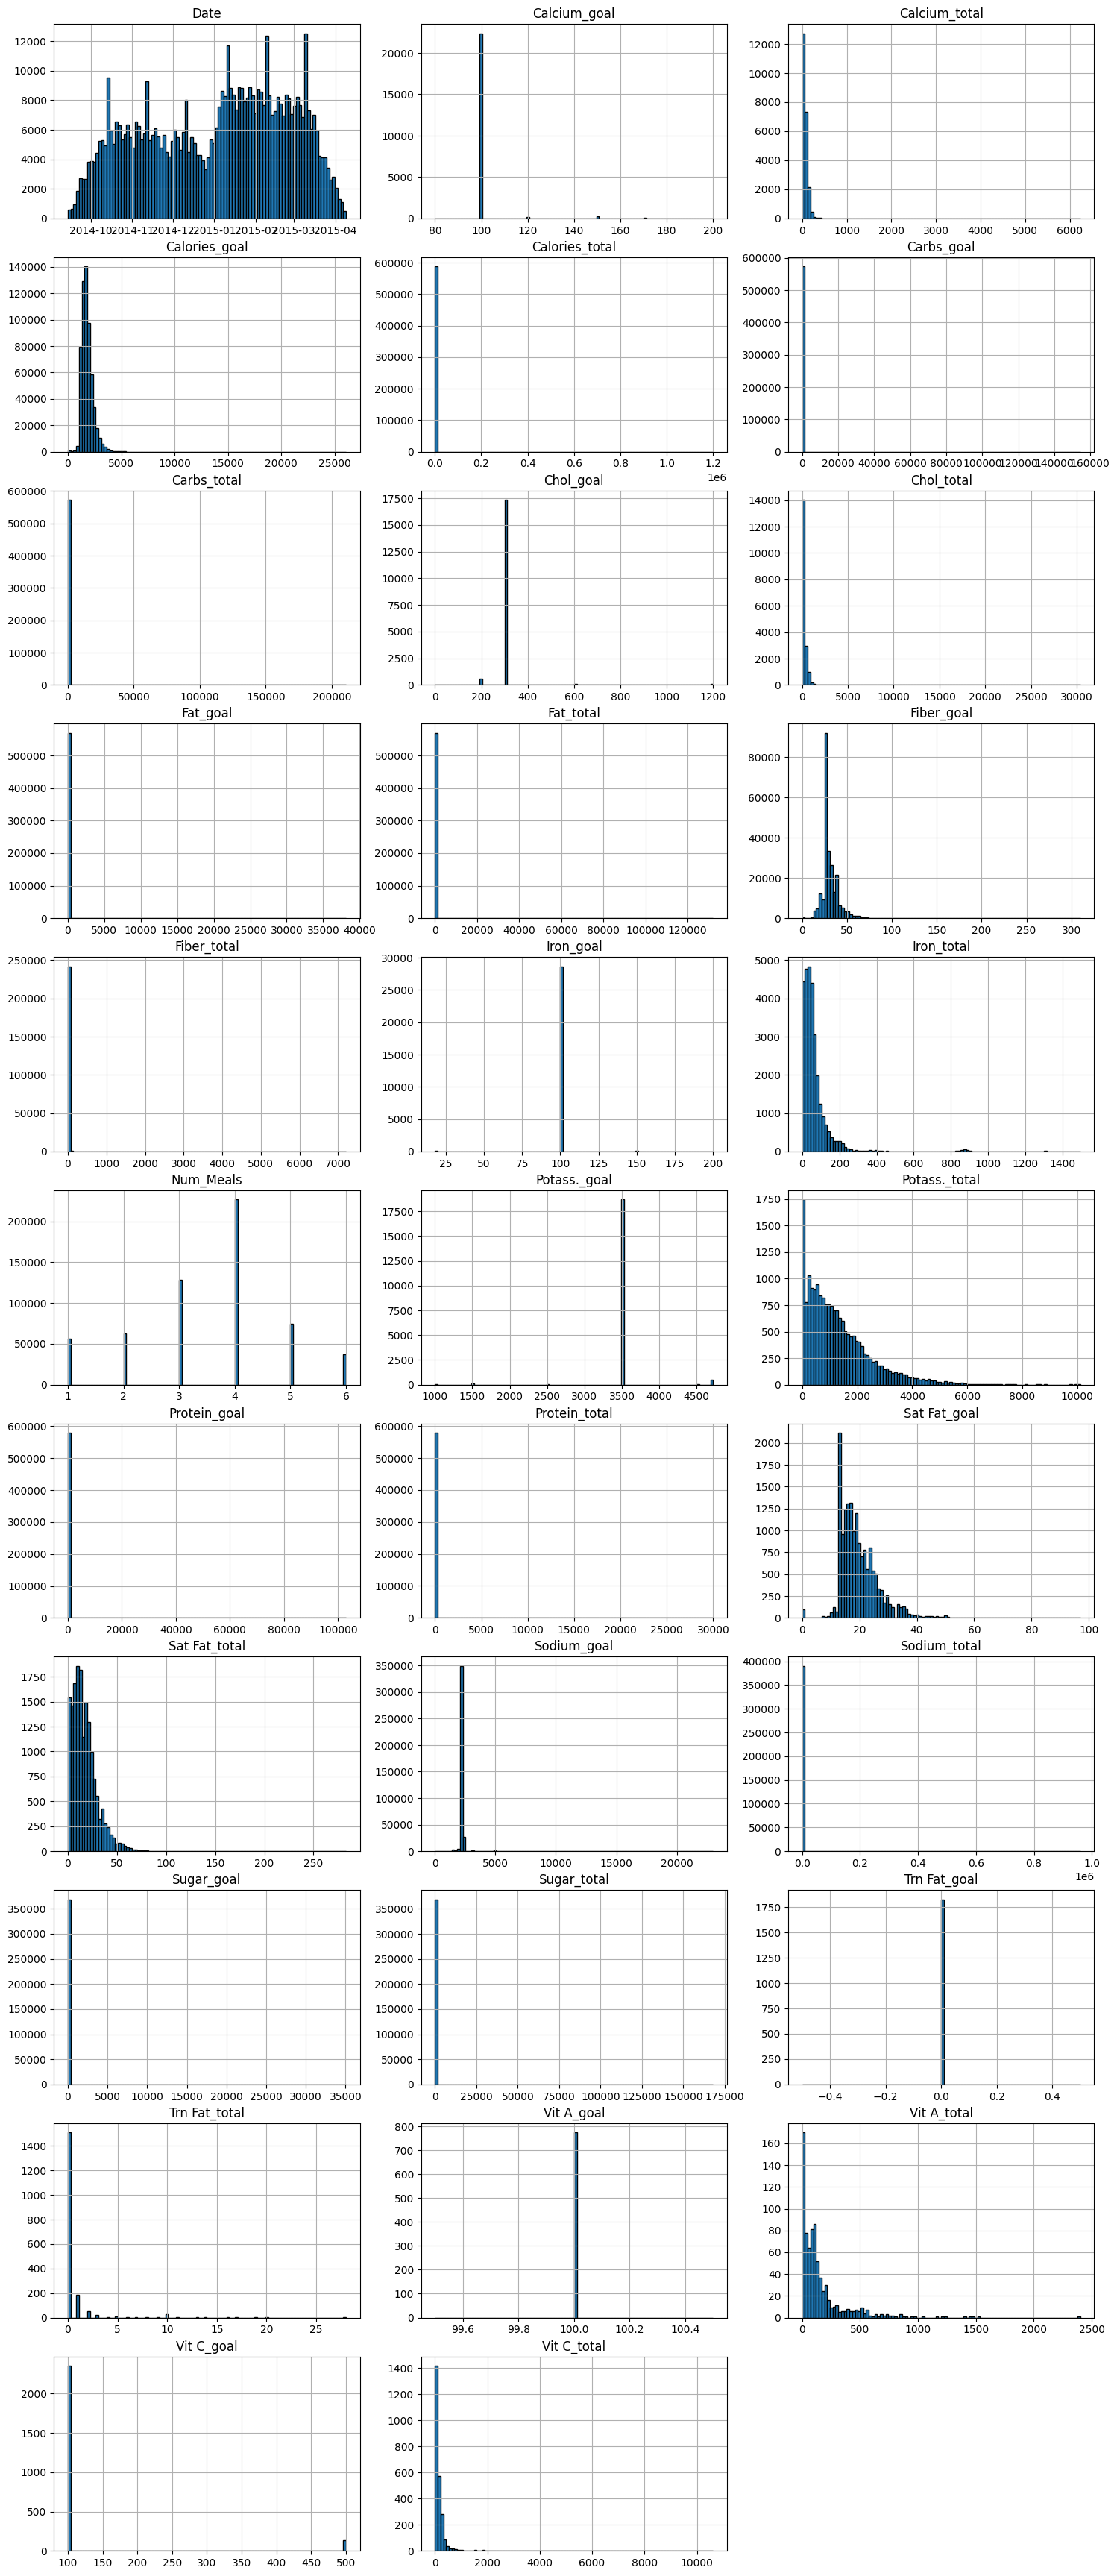

In [8]:
numeric_cols = df.select_dtypes(include=["number", "datetime"]).columns.drop("ID", errors="ignore")

num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=100, edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

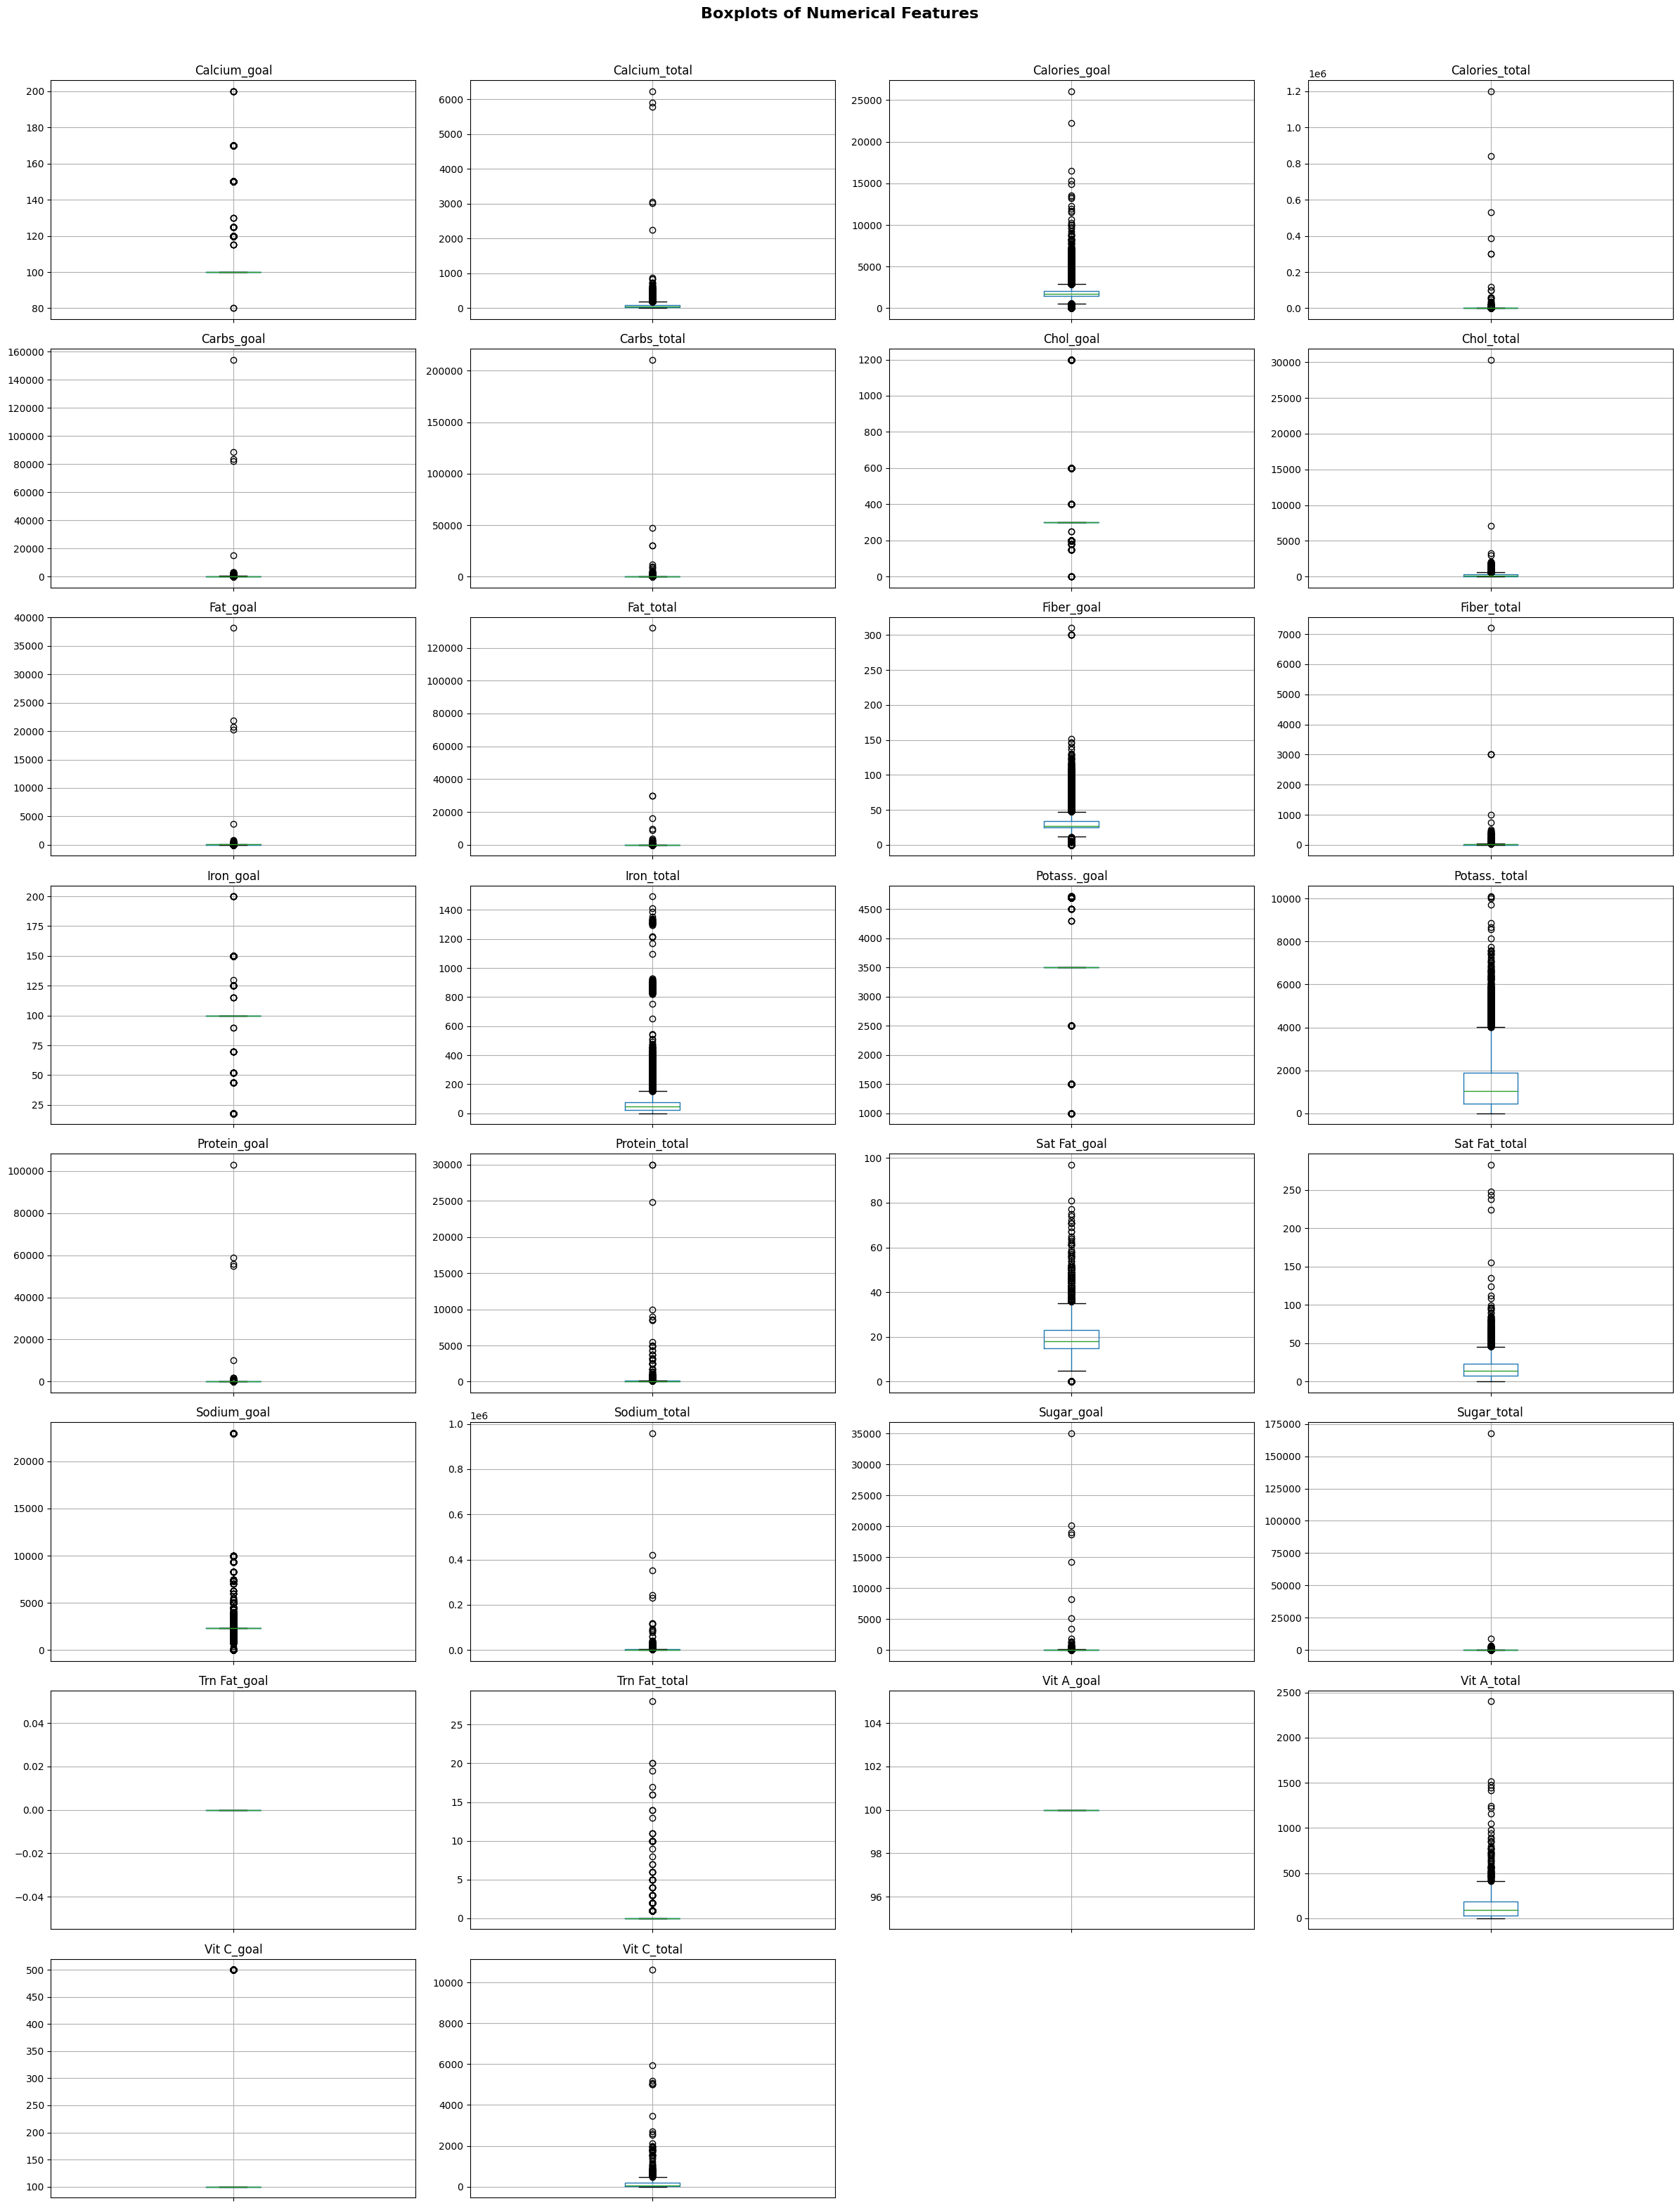

In [9]:
numeric_cols = df.select_dtypes(include=["number"]).columns.drop(["ID", "Num_Meals"], errors="ignore")

num_cols = len(numeric_cols)
cols = 4
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()


for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels([])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

> საკმაოდ ბევრგან გვაქვს აუთლაიერები, მაგრამ მკაცრ მიდგომას არ გამოვიყენებ გადასაყრელად და მხოლოდ ლოგიკასთან არმყოფებს, ანომალიებს გადავყრი.
>
> ლოგიკა ეფუძნება ნუტრიენტებზე მოპოვებულ ინფორმაციას და იმას თუ როგორია ფიზიკურად შეუძლებელი მინიმუმი და მაქსიმუმები

In [11]:
df.loc[(df['Calories_total'] > df['Calories_total'].quantile(0.999)) | (df['Calories_goal'] > df['Calories_goal'].quantile(0.999)),
        ["Calories_total", "Calories_goal"]].sort_values(by = 'Calories_total', ascending=False).head(40)

,Calories_total,Calories_goal
417958,1200800.0,1300.0
350182,840366.0,7265.0
385891,530000.0,1650.0
168950,386977.0,1761.0
551294,300000.0,3400.0
551295,300000.0,3400.0
354629,117889.0,1783.0
498107,100340.0,2094.0
456456,100000.0,2052.0
575046,60000.0,2160.0


In [12]:
df.loc[(df['Calories_total'] > df['Calories_total'].quantile(0.999)) | (df['Calories_goal'] > df['Calories_goal'].quantile(0.999)),
        ["Calories_total", "Calories_goal"]].sort_values(by = 'Calories_goal', ascending=False).head(10)

,Calories_total,Calories_goal
89644,1563.0,26068.0
89710,1055.0,22268.0
22358,1182.0,16497.0
89715,813.0,15329.0
128382,1035.0,14861.0
89629,4987.0,13539.0
89637,2348.0,13409.0
89633,1756.0,13208.0
21336,1837.0,12312.0
89625,1724.0,11968.0


In [13]:
df.shape

(587187, 35)

In [14]:
tmp = df[((df['Calories_total'] < 15000) | df['Calories_total'].isna()) & ((df['Calories_goal'] < 15000) | df['Calories_goal'].isna())]
tmp.shape

(587153, 35)

In [15]:
tmp.loc[(tmp['Carbs_total'] > tmp['Carbs_total'].quantile(0.999)) | (tmp['Carbs_goal'] > tmp['Carbs_goal'].quantile(0.9999)),
        ["Carbs_total", "Carbs_goal"]].sort_values(by = 'Carbs_total', ascending=False).head(10)

,Carbs_total,Carbs_goal
76041,9000.0,34.0
161487,4349.0,247.0
347056,3818.0,187.0
347057,3707.0,150.0
149159,3667.0,153.0
572465,3543.0,251.0
572452,3541.0,293.0
572458,3539.0,265.0
572468,3534.0,283.0
469178,3520.0,188.0


In [16]:
tmp.loc[(tmp['Carbs_total'] > tmp['Carbs_total'].quantile(0.999)) | (tmp['Carbs_goal'] > tmp['Carbs_goal'].quantile(0.9999)),
        ["Carbs_total", "Carbs_goal"]].sort_values(by = 'Carbs_goal', ascending=False).head(10)

,Carbs_total,Carbs_goal
264192,256.0,154417.0
264191,205.0,88408.0
264186,227.0,83849.0
264190,125.0,82065.0
264203,68.0,15065.0
571183,189.0,2972.0
571180,303.0,2972.0
571179,42.0,2828.0
128382,89.0,1858.0
89629,534.0,1690.0


In [17]:
tmp = tmp[((tmp['Carbs_total'] < 4000) | tmp['Carbs_total'].isna()) & ((tmp['Carbs_goal'] < 4000) | tmp['Carbs_goal'].isna())]
tmp.shape

(587146, 35)

In [18]:
tmp.loc[(tmp['Fat_total'] > tmp['Fat_total'].quantile(0.999)) | (tmp['Fat_goal'] > tmp['Fat_goal'].quantile(0.9999)),
        ["Fat_total", "Fat_goal"]].sort_values(by = 'Fat_total', ascending=False).head(10)

,Fat_total,Fat_goal
200549,16358.0,254.0
449318,3037.0,72.0
376807,2872.0,44.0
355525,2742.0,110.0
314918,2698.0,73.0
325070,1778.0,56.0
184497,1736.0,40.0
437900,1185.0,85.0
437897,1142.0,95.0
469178,1088.0,63.0


In [19]:
tmp.loc[(tmp['Fat_total'] > tmp['Fat_total'].quantile(0.999)) | (tmp['Fat_goal'] > tmp['Fat_goal'].quantile(0.9999)),
        ["Fat_total", "Fat_goal"]].sort_values(by = 'Fat_goal', ascending=False).head(10)

,Fat_total,Fat_goal
463113,28.0,645.0
571183,52.0,529.0
571180,48.0,529.0
571179,4.0,503.0
505285,162.0,502.0
176035,199.0,472.0
461075,253.0,464.0
89629,171.0,451.0
89637,67.0,447.0
146496,183.0,444.0


In [20]:
tmp = tmp[((tmp['Fat_total'] < 1500) | tmp['Fat_total'].isna()) & ((tmp['Fat_goal'] < 1500) | tmp['Fat_goal'].isna())]
tmp.shape

(587139, 35)

In [21]:
tmp.loc[(tmp['Protein_total'] > tmp['Protein_total'].quantile(0.9999)) | (tmp['Protein_goal'] > tmp['Protein_goal'].quantile(0.9999)),
        ["Protein_total", "Protein_goal"]].sort_values(by = 'Protein_total', ascending=False).head(30)

,Protein_total,Protein_goal
475790,8592.0,130.0
350125,8525.0,110.0
475750,4961.0,190.0
475727,4946.0,170.0
475787,4937.0,217.0
131135,4890.0,186.0
452184,4316.0,107.0
475799,3737.0,166.0
475795,3715.0,201.0
28817,3277.0,83.0


In [22]:
tmp.loc[(tmp['Protein_total'] > tmp['Protein_total'].quantile(0.9999)) | (tmp['Protein_goal'] > tmp['Protein_goal'].quantile(0.9999)),
        ["Protein_total", "Protein_goal"]].sort_values(by = 'Protein_goal', ascending=False).head(20)

,Protein_total,Protein_goal
571183,51.0,1784.0
571180,31.0,1784.0
571179,10.0,1697.0
49589,0.0,1031.0
571182,8.0,975.0
443130,109.0,974.0
21336,92.0,962.0
52639,64.0,924.0
374943,73.0,870.0
330735,149.0,867.0


In [23]:
tmp = tmp[((tmp['Protein_total'] < 1010) | tmp['Protein_total'].isna()) & ((tmp['Protein_goal'] < 1010) | tmp['Protein_goal'].isna())]
tmp.shape

(587111, 35)

In [24]:
tmp.loc[(tmp['Sodium_total'] > tmp['Sodium_total'].quantile(0.9999)) | (tmp['Sodium_goal'] > tmp['Sodium_goal'].quantile(0.9999)),
        ["Sodium_total", "Sodium_goal"]].sort_values(by = 'Sodium_total', ascending=False).head(40)

,Sodium_total,Sodium_goal
162078,353281.0,2300.0
57133,230526.0,2300.0
484954,119143.0,2300.0
166648,116787.0,2300.0
14650,114949.0,2300.0
166641,114460.0,2300.0
283008,88106.0,2300.0
237408,87873.0,2300.0
283007,78904.0,2300.0
104932,60051.0,2300.0


In [25]:
tmp.loc[(tmp['Sodium_total'] > tmp['Sodium_total'].quantile(0.999)) | (tmp['Sodium_goal'] > tmp['Sodium_goal'].quantile(0.9999)),
        ["Sodium_total", "Sodium_goal"]].sort_values(by = 'Sodium_goal', ascending=False).head(40)

,Sodium_total,Sodium_goal
86067,576.0,23009.0
86068,1224.0,23009.0
453387,11766.0,5000.0
455034,9865.0,5000.0
121347,9755.0,3000.0
135056,9152.0,2500.0
126490,12944.0,2500.0
473348,13200.0,2500.0
126419,9587.0,2500.0
126421,10458.0,2500.0


In [26]:
tmp['Sodium_goal'] = tmp['Sodium_goal'].map(lambda x: 2300 if x > 3500 else x)

In [27]:
tmp.loc[(tmp['Sodium_total'] > tmp['Sodium_total'].quantile(0.999)) | (tmp['Sodium_goal'] > tmp['Sodium_goal'].quantile(0.9999)),
        ["Sodium_total", "Sodium_goal"]].sort_values(by = 'Sodium_goal', ascending=False).head()

,Sodium_total,Sodium_goal
121347,9755.0,3000.0
258865,9329.0,2500.0
126419,9587.0,2500.0
126490,12944.0,2500.0
126488,10627.0,2500.0


In [28]:
tmp = tmp[(tmp['Sodium_total'] < 20000) | (tmp['Sodium_total'].isna())]
tmp.shape

(587047, 35)

In [29]:
tmp.loc[(tmp['Sugar_total'] > tmp['Sugar_total'].quantile(0.999)) | (tmp['Sugar_goal'] > tmp['Sugar_goal'].quantile(0.999)),
        ["Sugar_total", "Sugar_goal"]].sort_values(by = 'Sugar_total', ascending=False).head(20)

,Sugar_total,Sugar_goal
564753,3240.0,89.0
500861,2787.0,53.0
149159,2688.0,46.0
416039,1954.0,49.0
572452,1833.0,81.0
572468,1822.0,73.0
572465,1804.0,65.0
572482,1799.0,91.0
572450,1790.0,62.0
572458,1787.0,69.0


In [30]:
tmp.loc[(tmp['Sugar_total'] > tmp['Sugar_total'].quantile(0.999)) | (tmp['Sugar_goal'] > tmp['Sugar_goal'].quantile(0.999)),
        ["Sugar_total", "Sugar_goal"]].sort_values(by = 'Sugar_goal', ascending=False).head(20)

,Sugar_total,Sugar_goal
335842,15.0,14212.0
335843,5.0,8151.0
1346,41.0,5085.0
481027,36.0,1864.0
481028,54.0,1382.0
481029,6.0,1317.0
481026,70.0,1122.0
72811,20.0,720.0
481008,16.0,672.0
363294,70.0,613.0


In [31]:
tmp = tmp[((tmp['Sugar_total'] < 1000) | tmp['Sugar_total'].isna()) & ((tmp['Sugar_goal'] < 1000) | tmp['Sugar_goal'].isna())]
tmp.shape

(587008, 35)

In [32]:
tmp.loc[(tmp['Fiber_total'] > tmp['Fiber_total'].quantile(0.999)) | (tmp['Fiber_goal'] > tmp['Fiber_goal'].quantile(0.999)),
        ["Fiber_total", "Fiber_goal"]].sort_values(by = 'Fiber_total', ascending=False).head(50)

,Fiber_total,Fiber_goal
162661,7207.0,29.0
5570,753.0,31.0
174834,503.0,21.0
174819,467.0,30.0
127143,430.0,47.0
177678,427.0,30.0
412197,394.0,25.0
189418,389.0,25.0
189469,381.0,25.0
412226,379.0,25.0


In [33]:
tmp.loc[(tmp['Fiber_total'] > tmp['Fiber_total'].quantile(0.999)) | (tmp['Fiber_goal'] > tmp['Fiber_goal'].quantile(0.999)),
        ["Fiber_total", "Fiber_goal"]].sort_values(by = 'Fiber_goal', ascending=False).head(20)

,Fiber_total,Fiber_goal
128382,17.0,310.0
53045,33.0,300.0
53044,15.0,300.0
53043,8.0,300.0
53042,27.0,300.0
53041,38.0,300.0
53040,39.0,300.0
392458,6.0,152.0
545064,1.0,147.0
327944,20.0,146.0


In [34]:
tmp = tmp[((tmp['Fiber_total'] <= 200) | tmp['Fiber_total'].isna()) & ((tmp['Fiber_goal'] <= 200) | tmp['Fiber_goal'].isna())]
tmp.shape

(586956, 35)

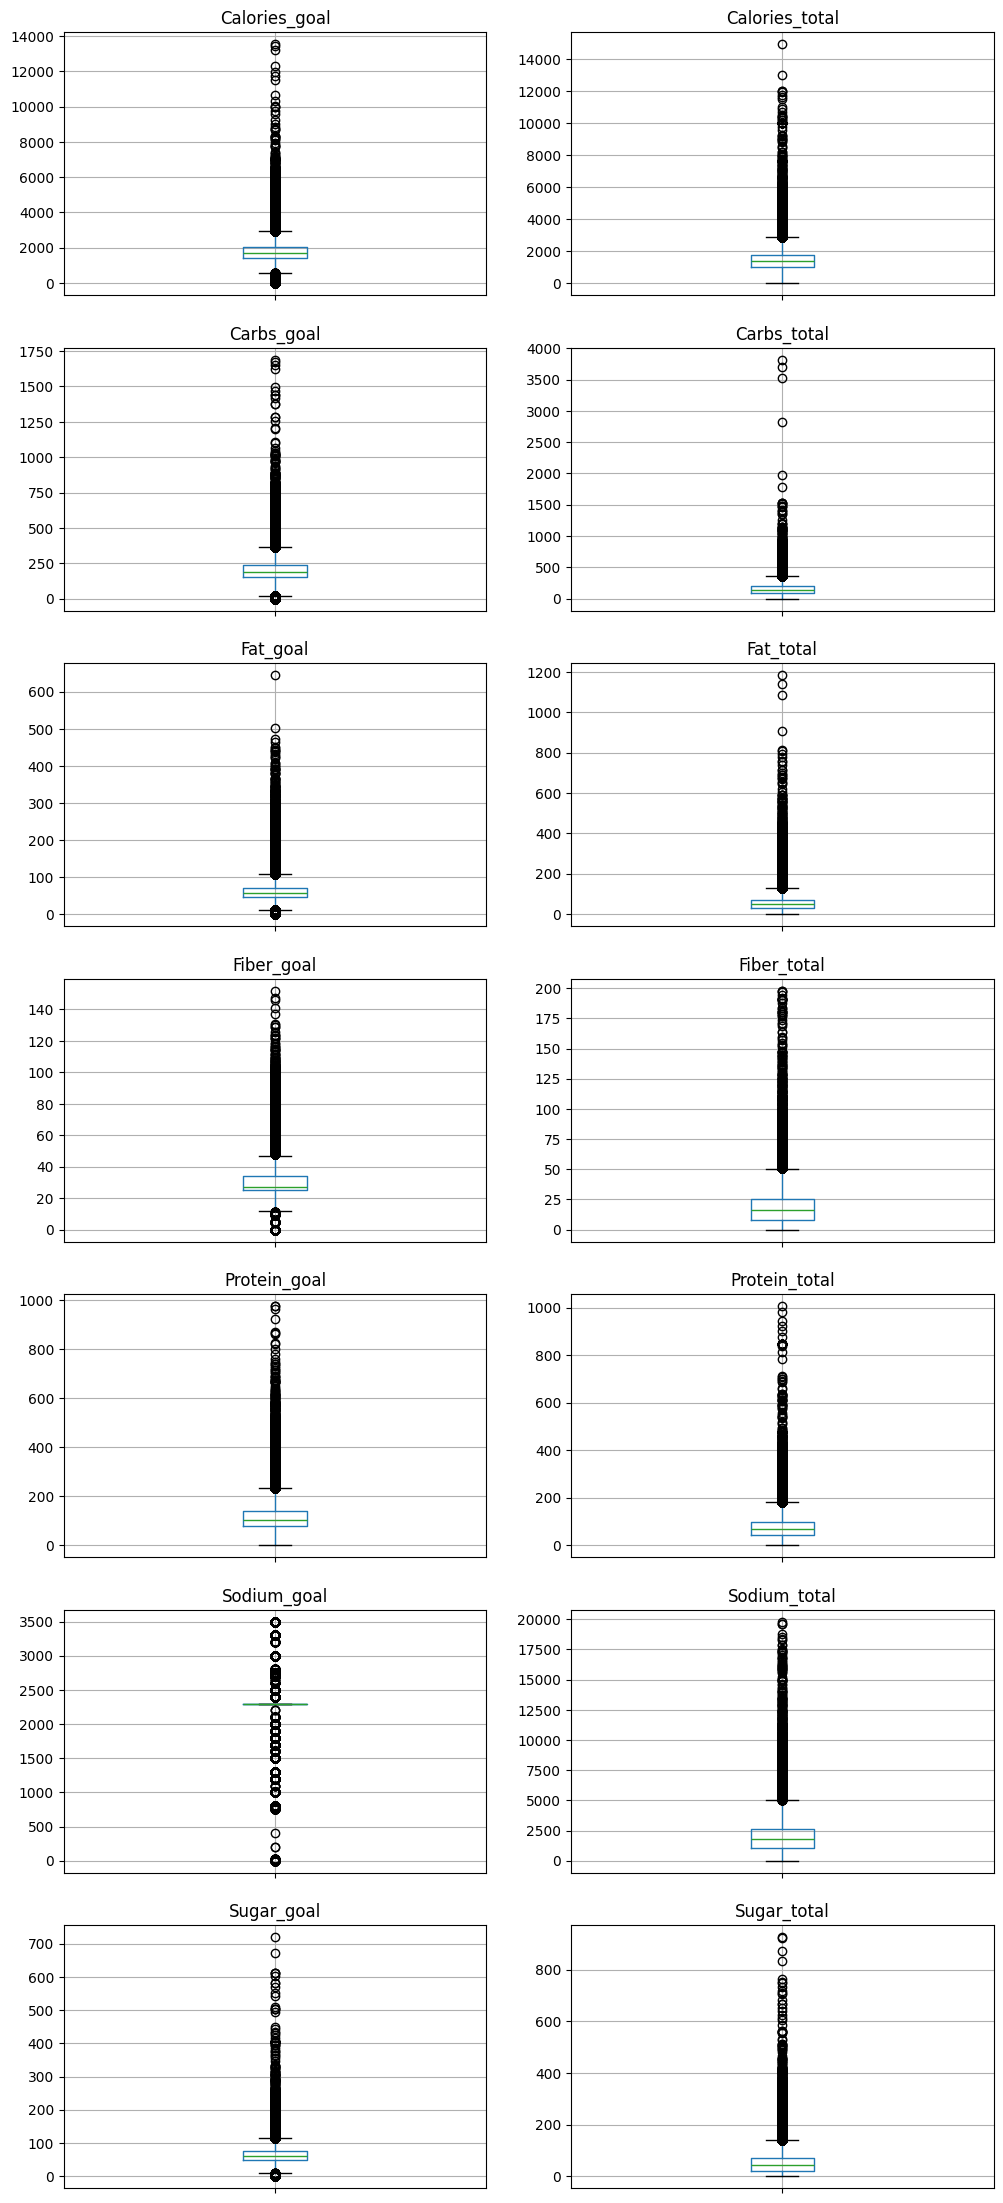

In [70]:
numeric_cols = tmp.select_dtypes(include=["number"]).columns.drop([
    "ID", "Num_Meals", "Calcium_goal", "Calcium_total",
    "Chol_goal", "Chol_total", "Iron_goal", "Iron_total",
    "Potass._goal", "Potass._total", "Sat Fat_goal", "Sat Fat_total",
    "Trn Fat_goal", "Trn Fat_total", "Vit A_goal", "Vit A_total",
    "Vit C_goal", "Vit C_total"
], errors="ignore")

num_cols = len(numeric_cols)
cols = 2
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()


for i, col in enumerate(numeric_cols):
    tmp.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels([])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [72]:
final_df = tmp.drop(columns=["Calcium_goal", "Calcium_total", "Chol_goal", "Chol_total", "Iron_goal", "Iron_total","Potass._goal", "Potass._total",
                             "Sat Fat_goal", "Sat Fat_total", "Trn Fat_goal", "Trn Fat_total", "Vit A_goal", "Vit A_total", "Vit C_goal", "Vit C_total", "Dishes"
                             ])
final_df.shape
final_df.head()

,ID,Date,Calories_goal,Calories_total,Carbs_goal,Carbs_total,Fat_goal,Fat_total,Fiber_goal,Fiber_total,Meals,Num_Meals,Protein_goal,Protein_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,1,2014-09-14,3173.0,2924.0,396.0,340.0,105.0,114.0,NaN,NaN,MY food,1,160.0,186.0,2300.0,3658.0,119.0,109.0
1,1,2014-09-15,1572.0,2430.0,196.0,96.0,52.0,37.0,NaN,NaN,MY food,1,79.0,50.0,2300.0,855.0,59.0,63.0
2,1,2014-09-16,1832.0,1862.0,229.0,158.0,61.0,54.0,NaN,NaN,MY food,1,92.0,114.0,2300.0,2215.0,69.0,100.0
3,1,2014-09-17,1685.0,2251.0,210.0,187.0,56.0,60.0,NaN,NaN,MY food,1,85.0,98.0,2300.0,1765.0,63.0,105.0
4,1,2014-09-18,1597.0,2001.0,199.0,113.0,53.0,81.0,NaN,NaN,MY food,1,80.0,202.0,2300.0,1101.0,60.0,71.0


In [74]:
final_df.to_parquet("mfp_cleaned_final.parquet")